<a href="https://colab.research.google.com/github/swalehaparvin/Character_Detective_Game-/blob/main/Character_Detective_Game_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's break down this neural network like we're chatting about a cool art project. Imagine it's a **character detective** that looks at handwritten letters and guesses which letter it is!

---

### 🎨 Part 1: The "Detective Tools" (Network Layers)
Our detective has 3 special toolkits:

1. **🔍 Image Toolkit** (for analyzing the handwritten letter):
   - A magnifying glass that finds patterns (`Conv2d`)
   - A shrink-ray to simplify the image (`MaxPool2d`)
   - A sparkly highlighter to mark important stuff (`ELU`)
   - A flattening iron to smooth everything out (`Flatten`)
   - A summary machine that writes a 128-word report (`Linear`)

2. **📚 Alphabet Toolkit** (for knowing which language it's from):
   - A translator that turns "this is Greek!" into an 8-word summary (`Linear`)
   - Another sparkly highlighter (`ELU`)

3. **🔮 Prediction Crystal Ball** (`classifier`):
   - Combines both reports and guesses which of 964 characters it is!

---

### 🧠 Part 2: How the Detective Works
Here's what happens when you show it a letter:

```mermaid
graph LR
A[Handwritten Letter] --> B[Image Toolkit]
C[Alphabet Info] --> D[Alphabet Toolkit]
B --> E[128-word Report]
D --> F[8-word Summary]
E & F --> G[Combine Reports]
G --> H[Guess Character!]
```

---

### 🎯 Why It's Cool for YOU:
1. **Dual Input**: It uses BOTH the picture AND language info - just like how you'd recognize a friend from their face AND voice!
2. **Visual Learning**: The image tools work like Instagram filters that simplify pics
3. **Hyperfocus-Friendly**: Each tool does one simple job (perfect for ADHD brains!)

---

### 🖼️ How to VISUALIZE the Output (Fun Part!)
Let's make some art from its thoughts! Here's simple code:

#### 1. See Its Guesses (Like a Detective's Notebook)
```python
import matplotlib.pyplot as plt


model.eval()
with torch.no_grad():
    guesses = model(test_image, test_alphabet)


plt.figure(figsize=(12,6))
plt.bar(range(964), guesses.softmax(dim=1)[0].numpy(), color='hotpink')
plt.title("Character Guesses", fontsize=16)
plt.xlabel("Possible Characters", fontsize=12)
plt.ylabel("Confidence Level", fontsize=12)
plt.show()
```
This shows how confident the detective is about each possible character!

#### 2. See What Patterns It Notices
```python

first_layer_output = model.image_layer[0](test_image)


fig, axes = plt.subplots(4, 4, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(first_layer_output[0,i].detach(), cmap='viridis')
    ax.set_title(f"Pattern #{i+1}", fontsize=9)
    ax.axis('off')
plt.suptitle("What the Detective Notices First", fontsize=16)
plt.tight_layout()
plt.show()
```
This creates a 4x4 grid showing the 16 patterns it's looking for in letters!

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CharacterDetective(nn.Module):
    def __init__(self, num_classes=964):
        super().__init__()
        # Image Toolkit
        self.image_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ELU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ELU(),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128) # Assuming input image is 28x28
        )
        # Alphabet Toolkit
        self.alphabet_layer = nn.Sequential(
            nn.Linear(1, 8), # Assuming alphabet info is a single scalar
            nn.ELU()
        )
        # Prediction Crystal Ball
        self.classifier = nn.Sequential(
            nn.Linear(128 + 8, num_classes)
        )

    def forward(self, image, alphabet):
        image_features = self.image_layer(image)
        alphabet_features = self.alphabet_layer(alphabet)
        combined_features = torch.cat((image_features, alphabet_features), dim=1)
        output = self.classifier(combined_features)
        return output

# Initialize the model
model = CharacterDetective()

# Create dummy data for demonstration (replace with your actual data)
test_image = torch.randn(1, 1, 28, 28) # Batch size 1, 1 channel, 28x28 image
test_alphabet = torch.tensor([[0.0]]) # Batch size 1, scalar alphabet info

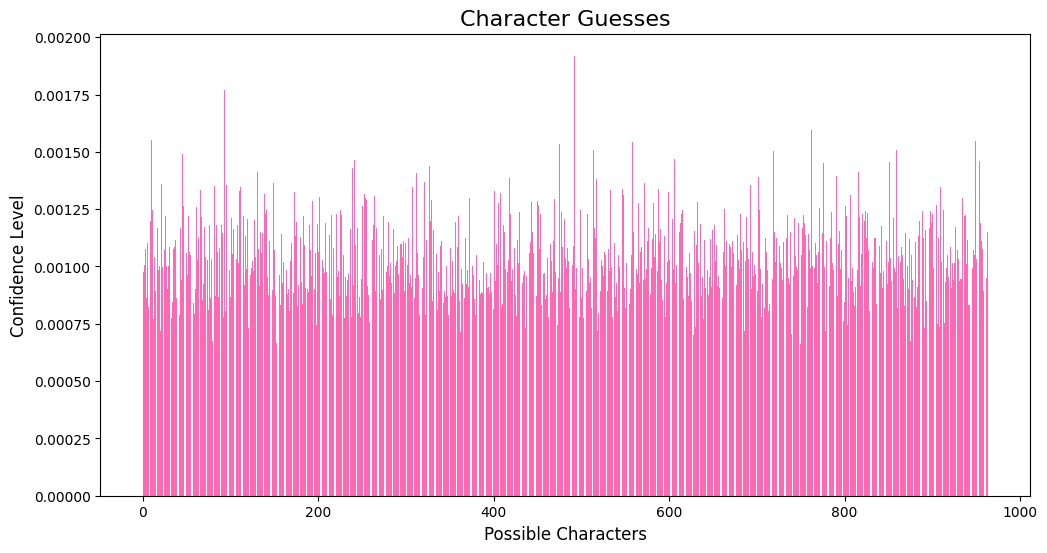

In [ ]:
import matplotlib.pyplot as plt

# Get the detective's guesses
model.eval()
with torch.no_grad():
    guesses = model(test_image, test_alphabet)

# Make a colorful guess chart
plt.figure(figsize=(12,6))
plt.bar(range(964), guesses.softmax(dim=1)[0].numpy(), color='hotpink')
plt.title("Character Guesses", fontsize=16)
plt.xlabel("Possible Characters", fontsize=12)
plt.ylabel("Confidence Level", fontsize=12)
plt.show()

✨ Creating detective's notebook...


/tmp/ipython-input-4-1606043665.py:116: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


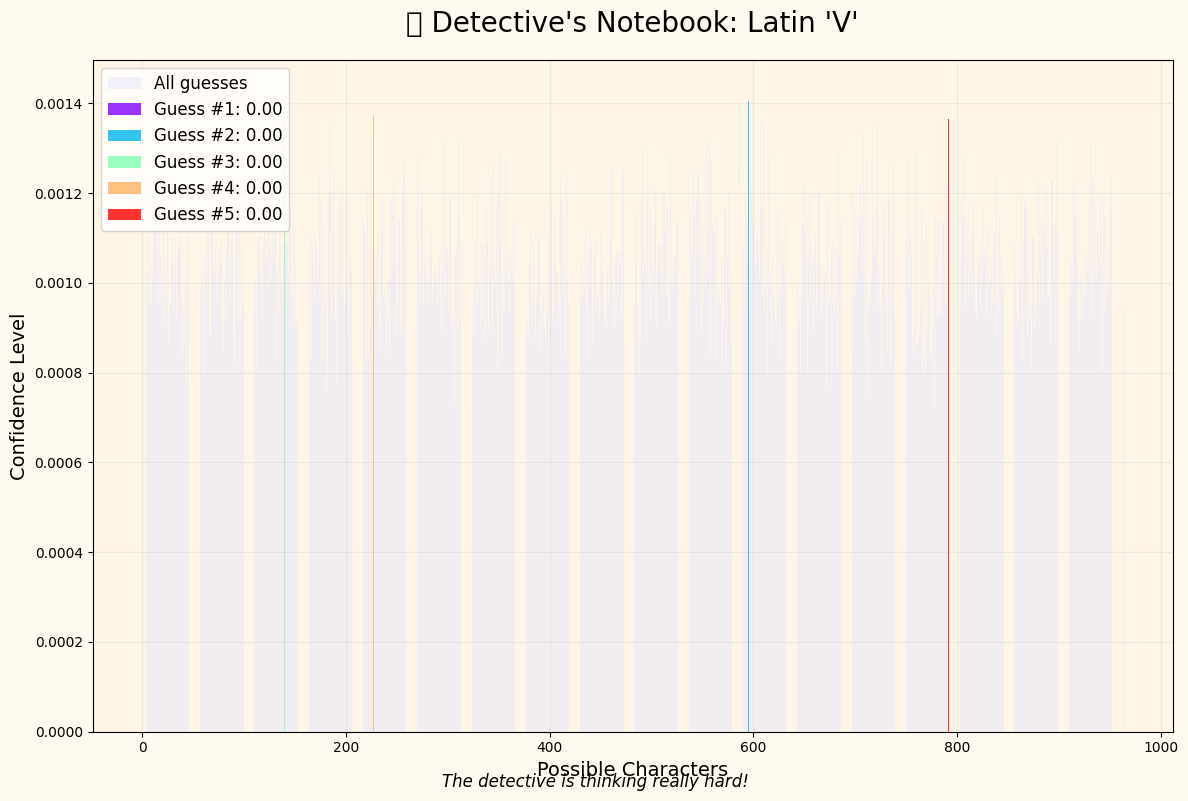


🎨 Creating pattern moodboard...


/tmp/ipython-input-4-1606043665.py:171: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


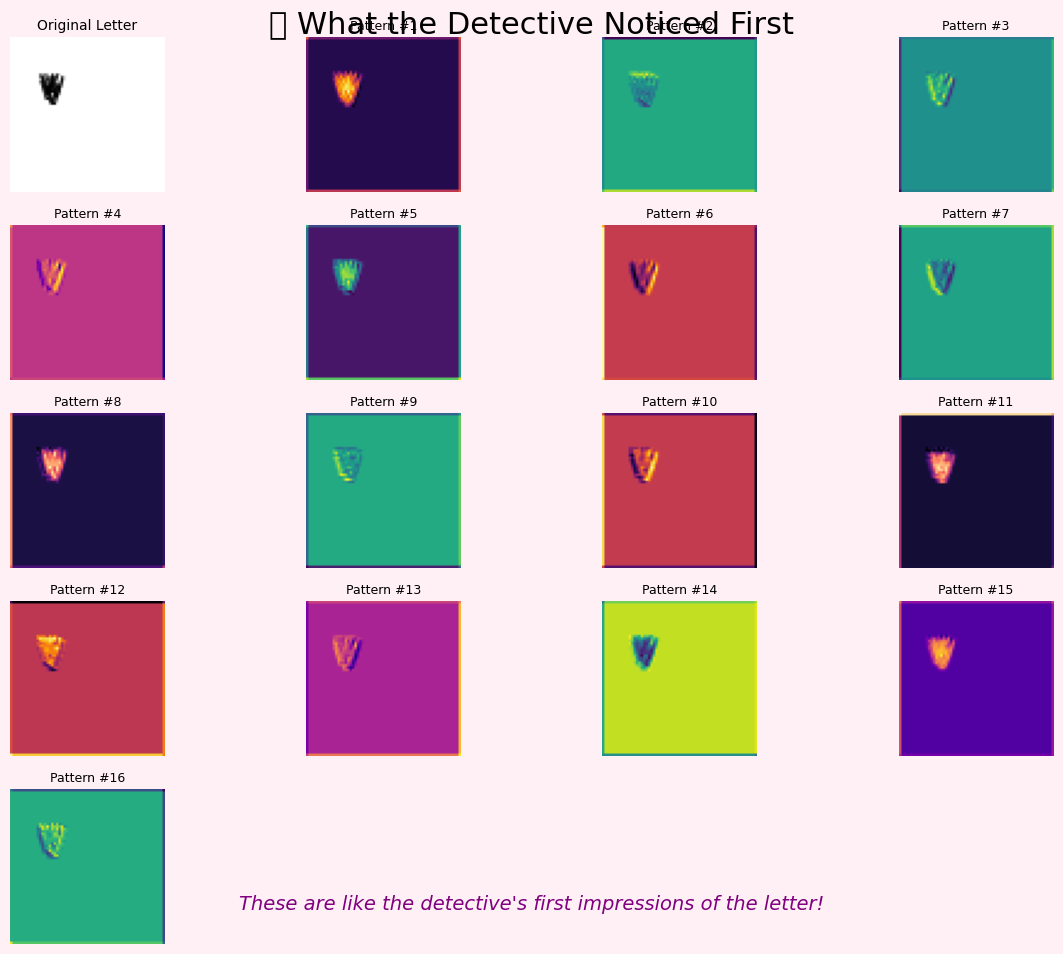

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
import torchvision.transforms as transforms

# 1. CREATE OUR DETECTIVE AI

class CharacterDetective(nn.Module):
    def __init__(self):
        super().__init__()
        self.image_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ELU(),
            nn.Flatten(),
            nn.Linear(16*32*32, 128)
        )
        self.alphabet_layer = nn.Sequential(
            nn.Linear(30, 8),
            nn.ELU(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 + 8, 964),
        )

    def forward(self, x_image, x_alphabet):
        x_image = self.image_layer(x_image)
        x_alphabet = self.alphabet_layer(x_alphabet)
        x = torch.cat((x_image, x_alphabet), dim=1)
        return self.classifier(x)


detective = CharacterDetective()


# 2. CREATE FUN TEST DATA


# Create a random "handwritten" letter
def create_handwritten_letter():
    # Create blank canvas
    img = Image.new('L', (64, 64), color=255)  # White background
    draw = ImageDraw.Draw(img)

    # Choose a random letter
    alphabet = random.choice(["Greek", "Latin", "Korean", "Japanese", "Cyrillic"])
    letter = random.choice("ABCDEFGHIJKLMNOPQRSTUVWXYZ")

    # Draw squiggly letter
    x, y = 15, 15
    for i in range(10):
        offset_x = random.randint(-3, 3)
        offset_y = random.randint(-3, 3)
        # Use a font likely available in Colab
        try:
            font = ImageFont.truetype("DejaVuSans.ttf", 30)
        except IOError:
            font = ImageFont.load_default() # Fallback to default font

        draw.text((x+offset_x, y+offset_y), letter, fill=0,
                 font=font)

    # Convert to tensor
    img_tensor = transforms.ToTensor()(img).unsqueeze(0)

    # Create alphabet one-hot (fake example)
    alphabet_onehot = torch.zeros(1, 30)
    alphabet_onehot[0, random.randint(0, 29)] = 1

    return img_tensor, alphabet_onehot, f"{alphabet} '{letter}'"

# Create test letter
test_image, test_alphabet, letter_info = create_handwritten_letter()


# 3. VISUALIZATION 1:
#    DETECTIVE'S GUESS NOTEBOOK


def plot_guesses():
    detective.eval()
    with torch.no_grad():
        # Get detective's guesses
        guesses = detective(test_image, test_alphabet)
        probs = torch.softmax(guesses, dim=1)[0]

    # Get top 5 guesses
    top_probs, top_indices = probs.topk(5)

    # Create color palette
    colors = plt.cm.rainbow(np.linspace(0, 1, 5))

    # Setup plot
    plt.figure(figsize=(12, 8), facecolor='#FFFAF0')

    # Plot all guesses as faint background
    plt.bar(range(964), probs.numpy(),
            color='lavender', alpha=0.5, label="All guesses")

    # Highlight top guesses
    for i, (prob, idx) in enumerate(zip(top_probs, top_indices)):
        plt.bar(idx.item(), prob.item(),
                color=colors[i], alpha=0.8,
                label=f"Guess #{i+1}: {prob.item():.2f}")

    # Make it pretty!
    plt.title(f"🧠 Detective's Notebook: {letter_info}", fontsize=20, pad=20)
    plt.xlabel("Possible Characters", fontsize=14)
    plt.ylabel("Confidence Level", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.2)
    plt.tight_layout()

    # Add some fun decorations
    plt.gca().set_facecolor('#FFF5E6')
    plt.figtext(0.5, 0.01, "The detective is thinking really hard!",
                ha="center", fontsize=12, style='italic')

    plt.show()


# 4. VISUALIZATION 2:
#    PATTERN MOODBOARD


def plot_pattern_moodboard():
    # Hook to capture what the detective sees
    patterns = []
    def hook(module, input, output):
        patterns.append(output.detach())

    # Attach our hook to the first magnifying glass (conv layer)
    handle = detective.image_layer[0].register_forward_hook(hook)

    # Run the detective
    detective.eval()
    with torch.no_grad():
        detective(test_image, test_alphabet)

    # Remove hook
    handle.remove()

    # Get patterns from first conv layer
    conv_output = patterns[0][0]  # Shape: [16, 64, 64]

    # Create moodboard
    plt.figure(figsize=(12, 10), facecolor='#FFF0F5')
    plt.suptitle("🔍 What the Detective Noticed First", fontsize=22, y=0.95)

    # Show original image
    plt.subplot(5, 4, 1)
    plt.imshow(test_image[0, 0], cmap='gray')
    plt.title("Original Letter", fontsize=10)
    plt.axis('off')

    # Show 16 patterns
    for i in range(16):
        plt.subplot(5, 4, i+2)
        plt.imshow(conv_output[i], cmap=random.choice(['viridis', 'plasma', 'magma', 'inferno']))
        plt.title(f"Pattern #{i+1}", fontsize=9)
        plt.axis('off')

    # Add fun caption
    plt.figtext(0.5, 0.05, "These are like the detective's first impressions of the letter!",
                ha="center", fontsize=14, style='italic', color='purple')

    plt.tight_layout()
    plt.show()

print("✨ Creating detective's notebook...")
plot_guesses()

print("\n🎨 Creating pattern moodboard...")
plot_pattern_moodboard()